In [1]:
from scripts.utils import *

import pandas as pd 

import numpy as np


import os.path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
from time import time
from sklearn.model_selection import train_test_split

In [58]:
## execute make fd

In [2]:
## Preprocess
for file in os.listdir("data/renamed"):
    preprocess(file)

WARNING *** file size (6776223) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (6905920) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
0-0.5
WARNING *** file size (6905056) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
0-0.5
WARNING *** file size (6904822) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
0-0.5
WARNING *** file size (6781445) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (6764031) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
0-0.5
WARNING *** file size (6902554) n

In [3]:
import pandas as pd

for file in os.listdir("data/preprocessed"):
    df = pd.read_csv("data/preprocessed/"+file)
    print("======================================"+file)
    if(df.columns[0]!="Class"):
        print("NOT SCORED")
        continue
    if(df.columns[1]!="0-0.5"):
        df.rename(columns={"EEG 1 (0-0.5 Hz, 0-0.5Hz , 10s) (Mean, 10s)":"0-0.5"},inplace=True)
    EEG_2 = df["EEG 2"]
    Activity = df["Activity"]
    X = df.iloc[:,:-2]
    X.insert(X.shape[1],"EEG 2",EEG_2)
    X.insert(X.shape[1],"Activity",Activity)
    X.to_csv("data/preprocessed/"+file,index=False)


======================================23_preprocessed.csv
NOT SCORED
======================================5_preprocessed.csv
======================================8_preprocessed.csv
======================================4_preprocessed.csv
======================================3_preprocessed.csv
======================================2_preprocessed.csv
======================================6_preprocessed.csv
======================================20_preprocessed.csv
======================================9_preprocessed.csv
======================================10_preprocessed.csv
======================================7_preprocessed.csv
NOT SCORED
======================================16_preprocessed.csv
NOT SCORED
======================================22_preprocessed.csv
======================================1_preprocessed.csv
NOT SCORED
======================================21_preprocessed.csv
NOT SCORED
======================================13_preprocessed.csv
==========================

In [4]:
## Concatenate
import pandas as pd

X = pd.DataFrame()

for file in os.listdir("data/preprocessed"):
    df = pd.read_csv("data/preprocessed/"+file)
    if(df.columns[0]!="Class"):
        print(file+"NOT SCORED")
        continue
    X = pd.concat([X,df])

X
X.to_csv("data/X_preprocessed.csv",index=False)
p,s,w = class_count(X)

23_preprocessed.csvNOT SCORED
7_preprocessed.csvNOT SCORED
16_preprocessed.csvNOT SCORED
1_preprocessed.csvNOT SCORED
21_preprocessed.csvNOT SCORED
11_preprocessed.csvNOT SCORED
Examples:
    Total: 154043
    P: 10007 (6.50% of total)
    S: 64346 (41.77% of total)
    W: 79690 (51.73% of total)



In [5]:
X

,Class,0-0.5,0.5-1,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,...,16-16.5,16.5-17,17-17.5,17.5-18,18-18.5,18.5-19,19-19.5,19.5-20,EEG 2,Activity
0,2,112.466219,386.275243,111.214307,94.589533,65.982601,32.481262,23.512462,20.022571,42.155020,...,3.614764,6.002455,5.614338,4.946812,1.958384,4.844751,2.486510,3.610257,2.206653,0.101093
1,2,117.932295,124.743146,63.962187,41.514800,52.006847,37.215005,33.881616,30.515775,22.966995,...,3.659783,8.841288,4.715294,9.071930,6.063815,6.109256,3.298252,4.919295,-1.473123,0.200995
2,2,47.730008,56.238974,69.913574,28.844014,49.602042,58.413987,15.268867,31.066717,29.390456,...,4.259227,3.720859,4.329251,5.244743,2.048360,8.237504,2.844319,1.607012,3.520474,0.701697
3,2,126.214757,263.413074,22.690480,62.291360,51.319366,45.151023,17.741685,18.009278,27.517800,...,2.829078,4.075956,3.950742,6.305151,1.602701,3.240890,2.262298,1.961984,0.121365,0.500405
4,2,65.565947,84.330071,44.160341,74.342147,47.547590,31.381113,49.441001,49.994171,31.835481,...,2.837114,5.159813,3.976099,3.185130,3.847092,3.473680,4.651700,4.070736,-5.180086,0.900907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2,176.536240,258.705957,59.153833,63.788601,37.547656,14.483064,17.090895,11.095073,9.814588,...,3.772814,2.483775,2.847549,4.251519,1.869109,2.437425,0.950953,1.739877,-6.036284,0.201094
8636,2,96.872266,154.686539,142.372559,73.771304,32.954706,15.150568,23.685892,36.340840,27.408102,...,4.280660,2.865040,2.109152,4.876663,2.882300,2.904351,2.979001,1.525098,-2.057861,0.100994
8637,2,208.590584,305.591292,81.630504,60.119215,43.539959,34.755211,17.904623,16.940312,9.056965,...,4.203222,3.564343,0.949924,2.224930,2.787905,1.831310,3.607349,1.504794,5.535449,0.501397
8638,2,85.126105,37.888519,64.269068,79.333006,45.920712,55.105410,36.009151,18.523926,15.341147,...,1.429998,2.991180,2.694050,2.938516,3.912944,1.644818,1.285005,1.173186,-3.482297,0.601299


In [13]:
target_filename = 'X' # or 'control' or 'deprivation'
df = pd.read_csv("data/"+target_filename+"_preprocessed.csv")
df
# Balancing
ps = df.loc[df["Class"]==0]
ss = df.loc[df["Class"]==1]
ws = df.loc[df["Class"]==2]
for i in range(int(w/p)):
  df = pd.concat([df,ps])
p,s,w = class_count(df)

df.to_csv("data/"+target_filename+"_balanced.csv",index=False)

Examples:
    Total: 224092
    P: 80056 (35.72% of total)
    S: 64346 (28.71% of total)
    W: 79690 (35.56% of total)



In [14]:
df = pd.read_csv("data/"+target_filename+"_balanced.csv")
target_filename = 'X' # or 'control' or 'deprivation'

# df = pd.read_csv("data/"+target_filename+"_preprocessed.csv")

from sklearn.model_selection import train_test_split

# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))
print(train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)


train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

total = p + s + w
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_p = (1 / p)*(total)/2.0 
weight_for_w = (1 / w)*(total)/2.0
weight_for_s = (1 / s)*(total)/2.0


class_weight = {0: weight_for_p, 1: weight_for_s, 2: weight_for_w}

print('Weight for class 0: {:.2f}'.format(weight_for_p))
print('Weight for class 1: {:.2f}'.format(weight_for_s))
print('Weight for class 2: {:.2f}'.format(weight_for_w))

(143418,)
(35855,)
(44819,)
Weight for class 0: 1.40
Weight for class 1: 1.74
Weight for class 2: 1.41


/home/andrew/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
/home/andrew/.local/lib/python3.8/site-packages/keras/backend.py:4846: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


Epoch 1/100
718/718 [==============================] - 3s 3ms/step - loss: 21.9806 - categorical_accuracy: 0.6431 - precision: 0.4356 - recall: 0.6491 - auc: 0.6537 - val_loss: 3.0812 - val_categorical_accuracy: 0.7670 - val_precision: 0.4781 - val_recall: 0.5836 - val_auc: 0.6816
Epoch 2/100
718/718 [==============================] - 2s 2ms/step - loss: 7.7459 - categorical_accuracy: 0.7447 - precision: 0.4163 - recall: 0.6254 - auc: 0.6192 - val_loss: 2.4214 - val_categorical_accuracy: 0.8180 - val_precision: 0.4828 - val_recall: 0.6933 - val_auc: 0.6989
Epoch 3/100
718/718 [==============================] - 1s 2ms/step - loss: 4.6674 - categorical_accuracy: 0.7688 - precision: 0.4146 - recall: 0.6870 - auc: 0.6283 - val_loss: 2.8077 - val_categorical_accuracy: 0.8198 - val_precision: 0.4641 - val_recall: 0.8264 - val_auc: 0.7345
Epoch 4/100
718/718 [==============================] - 2s 2ms/step - loss: 2.7416 - categorical_accuracy: 0.7843 - precision: 0.4415 - recall: 0.5918 - auc:

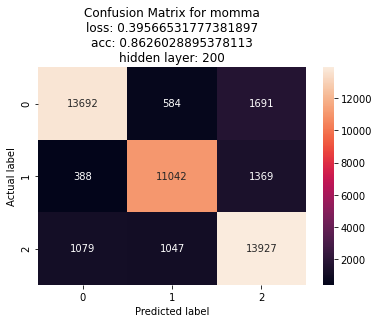

In [17]:
train_history,test_history,date,model = train(INPUT_FEATURES=(train_features.shape[-1],),
                                   hln=200,
                                   EPOCHS=100,
                                   weights=True)